### Create a CNN model for image classification using Keras

In [30]:
# import modules

import os
from skimage.io import imread
import skimage
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import cv2
import random


from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras import backend as K
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


In [12]:
# calculate image file paths

ROOT_PATH = 'D:/Study/DataScience/Data/DeepLearningData/animals'

training_path = os.path.join(ROOT_PATH, 'training')
testing_path = os.path.join(ROOT_PATH, 'testing')

fname = []
for root,d_names,f_names in os.walk(training_path):
    for f in f_names:
        fname.append(os.path.join(root, f))

# shuffle image list
random.shuffle(fname)

# prepare images

nrows = 150
ncolumns = 150
channels = 3

def read_and_process_image(list_of_images):
    X = [] # images
    y = [] # labels

    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR),(nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    return X,y


In [14]:
# Feature and target variable

X, y = read_and_process_image(fname)

# Convert list into numpy arroys

X = np.array(X)
y = np.array(y)

In [15]:
# get the count of unique values of classes
# total 8359 valus : 0 - 200
#                    1 - 200

unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [4000 4005]]


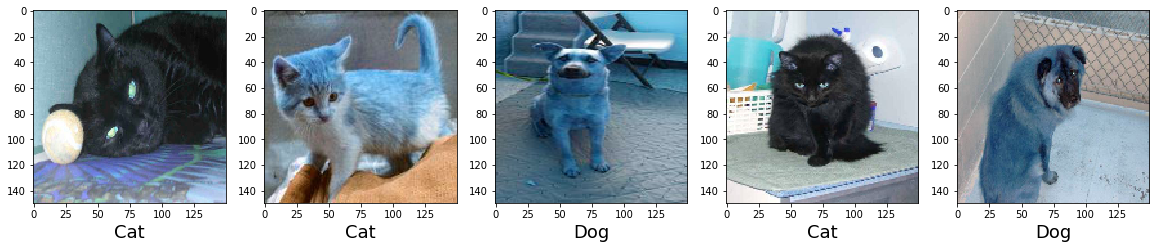

In [25]:
# verify the images have been loaded properly
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns +1, columns, i+1)
    plt.imshow(X[i])
    if y[i] == 0:
        plt.xlabel('Cat', fontsize=18)
    else:
        plt.xlabel('Dog', fontsize=18)

In [27]:
# Print the shape of total data

print(X.shape)
print(y.shape)

(8005, 150, 150, 3)
(8005,)


In [28]:
# split the data into training and testing datasets

from keras.utils import to_categorical
#image_labels = to_categorical(labels)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [29]:
print(X_train.shape)
print(y_train.shape)
#print(X_valtest.shape)
#print(y_valtest.shape)
print('\n')
print(X_test.shape)
print(y_test.shape)


(6404, 150, 150, 3)
(6404,)


(1601, 150, 150, 3)
(1601,)


In [35]:
# dimensions of our images.
#img_width, img_height = 150, 150

epochs = 50
batch_size = 32

# create a function for classification
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
#model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
  


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
# create image augmentation objectd to quickly convert images into tensors

train_datagen = ImageDataGenerator( rescale = 1./255, 
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator( rescale=1./255)

In [37]:
# create image generator

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

test_generator = train_datagen.flow(X_test, y_test, batch_size=batch_size)

In [40]:
# compile model

model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr = 1e-4), metrics=['acc'])


# create history generator



history = model.fit_generator(train_generator, steps_per_epoch= X_train.shape[0] // batch_size,
                             epochs=64,
                             validation_data= test_generator,
                             validation_steps= X_test.shape[0] // batch_size)
  

Instructions for updating:
Use tf.cast instead.
Epoch 1/64
200/200 [==============================] - 178s 888ms/step - loss: 0.6765 - acc: 0.5595 - val_loss: 0.6592 - val_acc: 0.6081
Epoch 2/64
200/200 [==============================] - 171s 853ms/step - loss: 0.6464 - acc: 0.6105 - val_loss: 0.6275 - val_acc: 0.6673
Epoch 3/64
200/200 [==============================] - 169s 843ms/step - loss: 0.6143 - acc: 0.6578 - val_loss: 0.6079 - val_acc: 0.6718
Epoch 4/64
200/200 [==============================] - 167s 835ms/step - loss: 0.5946 - acc: 0.6831 - val_loss: 0.5805 - val_acc: 0.6896
Epoch 5/64
200/200 [==============================] - 167s 833ms/step - loss: 0.5829 - acc: 0.6851 - val_loss: 0.6297 - val_acc: 0.6507
Epoch 6/64
200/200 [==============================] - 163s 817ms/step - loss: 0.5692 - acc: 0.6980 - val_loss: 0.6336 - val_acc: 0.6405
Epoch 7/64
200/200 [==============================] - 164s 818ms/step - loss: 0.5672 - acc: 0.7034 - val_loss: 0.5703 - val_acc: 0.6998


200/200 [==============================] - 216s 1s/step - loss: 0.3518 - acc: 0.8448 - val_loss: 0.3722 - val_acc: 0.8247
Epoch 60/64
200/200 [==============================] - 211s 1s/step - loss: 0.3437 - acc: 0.8530 - val_loss: 0.3691 - val_acc: 0.8279
Epoch 61/64
200/200 [==============================] - 224s 1s/step - loss: 0.3466 - acc: 0.8530 - val_loss: 0.3830 - val_acc: 0.8209
Epoch 62/64
200/200 [==============================] - 232s 1s/step - loss: 0.3311 - acc: 0.8531 - val_loss: 0.4050 - val_acc: 0.8158
Epoch 63/64
200/200 [==============================] - 217s 1s/step - loss: 0.3308 - acc: 0.8541 - val_loss: 0.3698 - val_acc: 0.8445
Epoch 64/64
200/200 [==============================] - 230s 1s/step - loss: 0.3304 - acc: 0.8542 - val_loss: 0.3913 - val_acc: 0.8349


In [ ]:
#X_train = X_train.reshape(-1,150, 150, 3)   #Reshape for CNN -  should work!!
#X_val = X_val.reshape(-1,150, 150, 3)
#X_test = X_test.reshape(-1,150, 150, 3)

#model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr = 1e-4), metrics=['acc'])

#history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                   #validation_data=(X_test, y_test))
  
#model.evaluate(X_test, y_test)


Text(0.5, 1.0, 'Accuracy Curves')

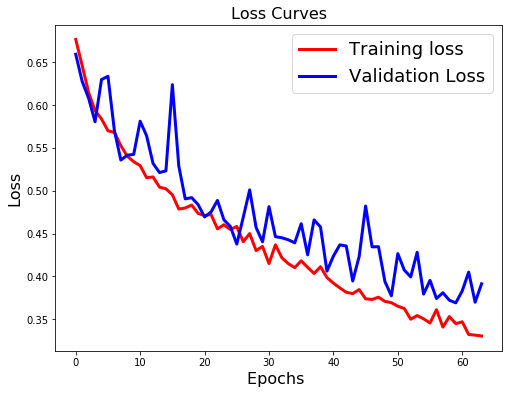

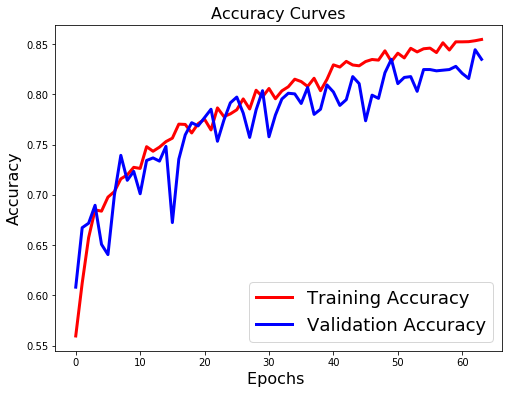

In [41]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

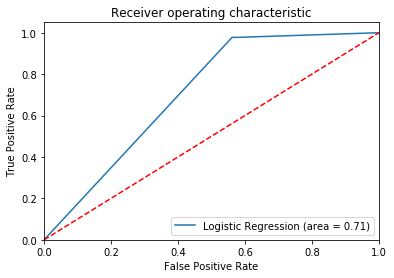

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()